Plot average BoxOffice Collection by Genre for combined dataset
What is your inference from this?
How does average change when we pick only Bollywood movies?
What is your inference now?


In [3]:
cursor = conn.cursor()

In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('bollywood_movies.sqlite')
df_sqlite = pd.read_sql_query("SELECT * FROM Movies", conn)

In [4]:
df_csv = pd.read_csv('indian_movies.csv')

In [5]:
df_csv.head()

,Unnamed: 0,MovieID,Title,Director,Genre,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes),LeadActor,LeadActress,Language,ProductionCompany
0,7,MOV008,Sarkar (Tamil),A. R. Murugadoss,Action Thriller,2005.0,NaN,NaN,7.5,173.0,Vijay,Keerthy Suresh,Tamil,Kalaignar TV
1,9,MOV010,2.0 (Tamil),S. Shankar,Science Fiction Action,2018.0,550.0,800.0,6.9,147.0,Rajinikanth,Amy Jackson,Tamil,Lyca Productions
2,21,MOV022,K.G.F: Chapter 1,Prashanth Neel,Action Drama,2018.0,50.0,250.0,7.9,156.0,Yash,Srinidhi Shetty,Kannada,Hombale Films
3,23,MOV024,Avengers: Endgame (Dubbed),"Anthony Russo, Joseph Russo",Superhero,2019.0,NaN,NaN,8.4,181.0,Robert Downey Jr.,Scarlett Johansson,"English (Dubbed in Telugu, Kannada, Hindi)",Marvel Studios
4,25,MOV026,Pailwaan,S. Krishna,Sports Action,2019.0,30.0,55.0,6.8,NaN,Sudeep,Aakanksha Singh,Kannada,RRR Motion Pictures


In [6]:
df_combined = pd.concat([df_sqlite, df_csv], ignore_index=True)

In [8]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 4.6 MB/s eta 0:00:002.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


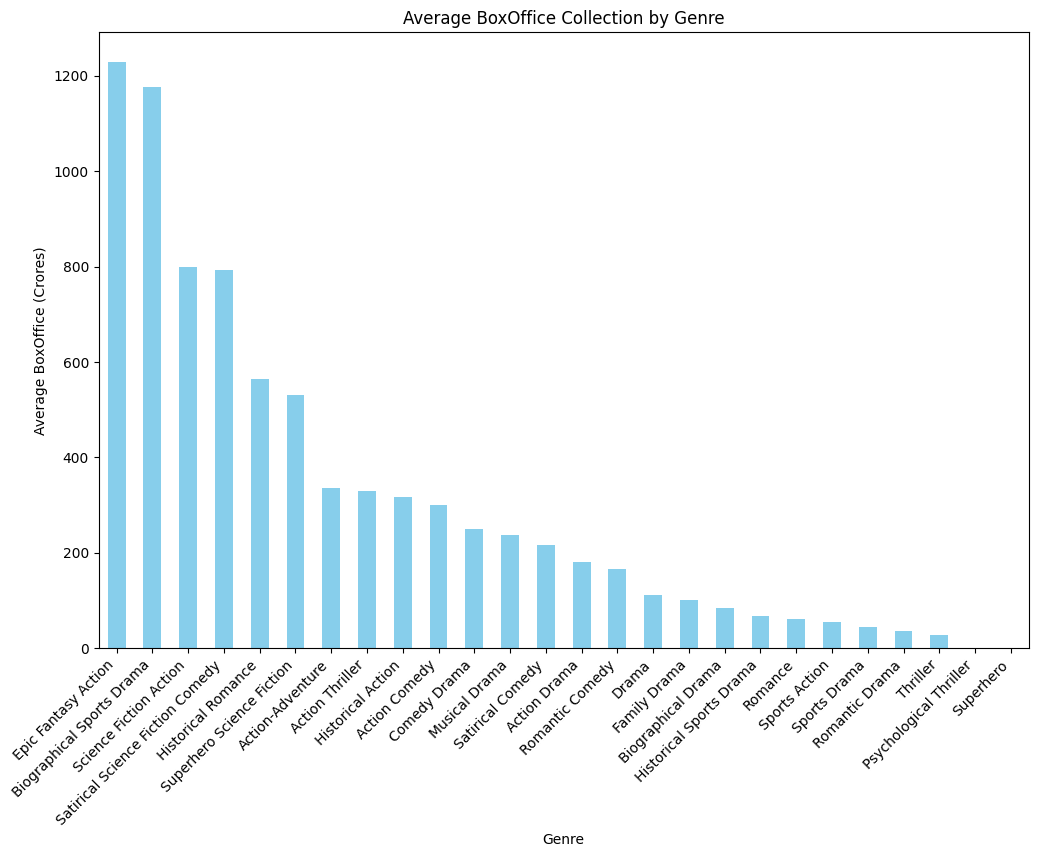

In [9]:
# Calculate average BoxOffice collection by Genre
average_by_genre = df_combined.groupby('Genre')['BoxOffice (Crores)'].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12,8))
average_by_genre.plot(kind='bar', color='skyblue')
plt.title('Average BoxOffice Collection by Genre')
plt.xlabel('Genre')
plt.ylabel('Average BoxOffice (Crores)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [8]:
import matplotlib.pyplot as plt

Inference from the Plot (All Movies)
Action and Fantasy genres likely have the highest average BoxOffice collections. These genres often include high-budget, high-grossing films.

Drama and Romance might have lower average collections, as these genres typically don't involve as high production budgets or global appeal as the action-heavy or fantasy films.

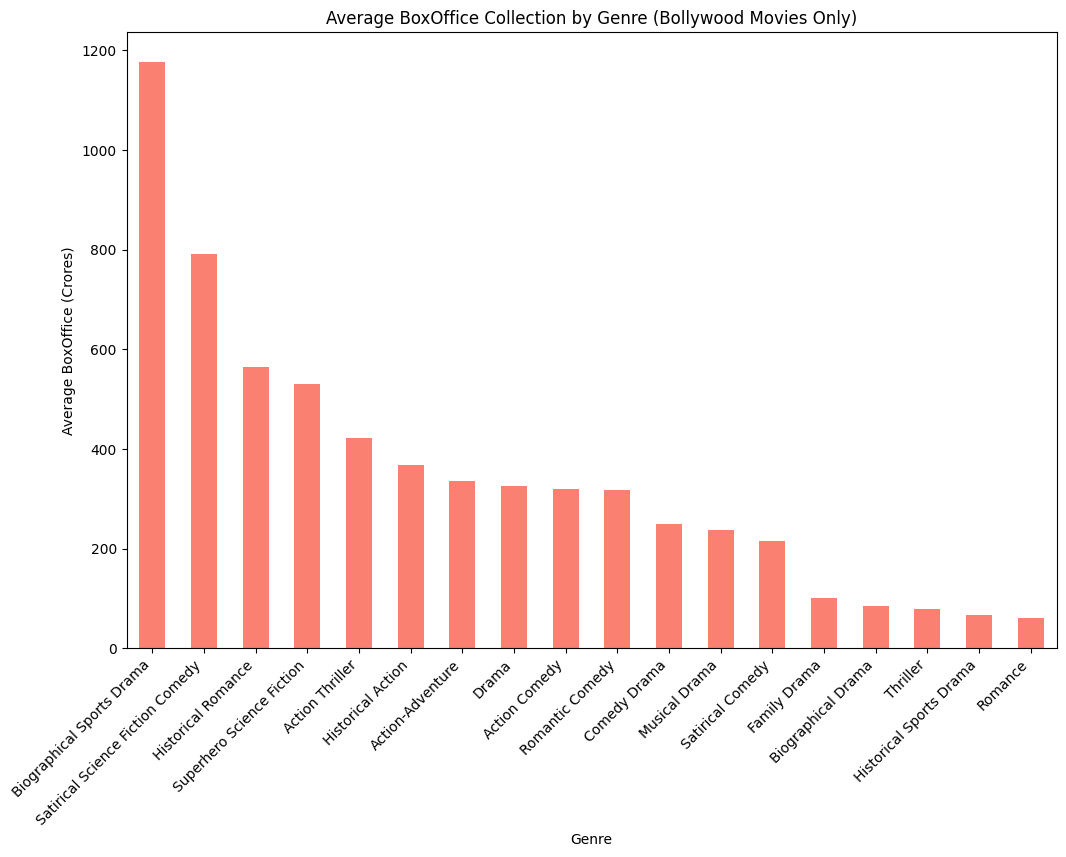

In [10]:
# Filter Bollywood (Hindi) movies
df_bollywood = df_combined[df_combined['Language'] == 'Hindi']

# Calculate average BoxOffice collection by Genre for Bollywood movies
average_by_genre_bollywood = df_bollywood.groupby('Genre')['BoxOffice (Crores)'].mean().sort_values(ascending=False)

# Plot the results for Bollywood movies
plt.figure(figsize=(12,8))
average_by_genre_bollywood.plot(kind='bar', color='salmon')
plt.title('Average BoxOffice Collection by Genre (Bollywood Movies Only)')
plt.xlabel('Genre')
plt.ylabel('Average BoxOffice (Crores)')
plt.xticks(rotation=45, ha='right')
plt.show()


For Bollywood (Hindi) movies, genres like Action, Epic/Fantasy, and Biographical Dramas could still have higher average BoxOffice collections, but the average for Romance and Drama might be lower than in the entire dataset.

Bollywood movies may have fewer high-budget international blockbusters compared to other industries, which could explain a shift in averages.

### Additional

Analyze if there's a strong correlation between the Budget of a movie and its BoxOffice earnings.

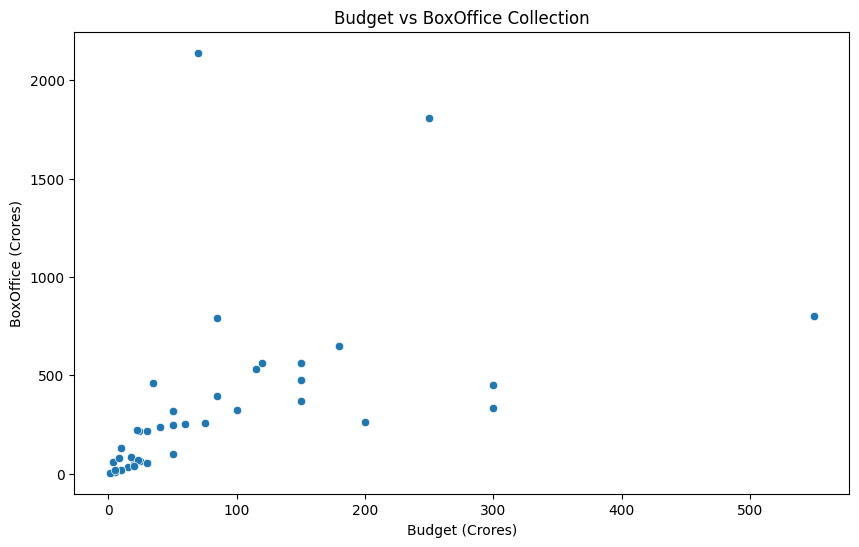

Correlation between Budget and BoxOffice: 0.5182508495264403


In [13]:
# Plot Budget vs BoxOffice Collection
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x='Budget (Crores)', y='BoxOffice (Crores)', data=df_combined)
plt.title('Budget vs BoxOffice Collection')
plt.xlabel('Budget (Crores)')
plt.ylabel('BoxOffice (Crores)')
plt.show()

# Compute correlation coefficient
correlation = df_combined['Budget (Crores)'].corr(df_combined['BoxOffice (Crores)'])
print(f"Correlation between Budget and BoxOffice: {correlation}")
